# Libraries import

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from typing import Optional

import seaborn as sns
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly as px

from sklearn.cluster import KMeans

import squarify

from sklearn.metrics import (silhouette_score,
                             calinski_harabasz_score,
                             davies_bouldin_score)

# Data import

In [61]:
dir = 'DATA'

In [62]:
recurrent_customers = pd.read_csv(dir + '/recurrent_customers.csv',encoding= 'utf-8')
recurrent_customers.head()

,customer_id,address_id,birthdate,gender,flag_phone_provided,flag_privacy,account_id,favorite_store,loyalty_type,loyatlty_status,...,district,region,customer_age,activation_duration,total_spending,purchase_datetime,num_purchases,time_to_last_purchase,churn,churn_nominal
0,514958,494806,2001-01-01,M,True,True,456034,9,standard,True,...,RM,Lazio,22,265,29.0,2023-03-18 12:02:12,12,43,0,No
1,568090,550583,1999-07-17,M,True,True,516673,3,standard,True,...,NaN,Campania,23,233,42.0,2022-09-09 17:45:18,6,233,1,Yes
2,883352,856187,1998-10-05,M,True,True,869428,3,standard,True,...,IS,Molise,24,36,80.0,2023-03-28 08:18:34,2,33,0,No
3,133809,118145,1997-11-22,F,True,True,30178,26,standard,True,...,BA,Puglia,25,468,19.0,2023-02-22 11:54:42,4,67,0,No
4,608947,592841,1997-06-28,F,True,True,600590,13,premium,True,...,RM,Lazio,25,188,96.0,2022-11-05 11:06:08,4,176,0,No


In [63]:
recurrent_customers = recurrent_customers[recurrent_customers['churn'] == 0]

In [64]:
recurrent_customers

,customer_id,address_id,birthdate,gender,flag_phone_provided,flag_privacy,account_id,favorite_store,loyalty_type,loyatlty_status,...,district,region,customer_age,activation_duration,total_spending,purchase_datetime,num_purchases,time_to_last_purchase,churn,churn_nominal
0,514958,494806,2001-01-01,M,True,True,456034,9,standard,True,...,RM,Lazio,22,265,29.0,2023-03-18 12:02:12,12,43,0,No
2,883352,856187,1998-10-05,M,True,True,869428,3,standard,True,...,IS,Molise,24,36,80.0,2023-03-28 08:18:34,2,33,0,No
3,133809,118145,1997-11-22,F,True,True,30178,26,standard,True,...,BA,Puglia,25,468,19.0,2023-02-22 11:54:42,4,67,0,No
4,608947,592841,1997-06-28,F,True,True,600590,13,premium,True,...,RM,Lazio,25,188,96.0,2022-11-05 11:06:08,4,176,0,No
6,755015,739609,1997-05-13,F,True,True,727435,5,standard,True,...,VI,Veneto,25,123,30.0,2022-12-28 12:24:48,4,123,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78238,553798,535486,1986-08-07,F,True,False,500113,29,premium,True,...,RM,Lazio,36,241,249.0,2023-02-22 12:52:56,30,67,0,No
78239,461841,444981,1969-04-23,M,True,True,395812,36,premium,True,...,MI,Lombardia,54,300,348.0,2023-04-23 17:02:58,40,7,0,No
78240,402776,381673,1964-01-07,F,True,True,328480,44,premium,True,...,VE,Veneto,59,334,416.0,2023-04-26 12:26:07,49,4,0,No
78241,531521,511908,1979-08-06,F,True,True,475116,49,standard,True,...,VA,Lombardia,43,254,295.0,2023-02-23 17:07:29,72,66,0,No


In [65]:
rfm = recurrent_customers[['customer_id','account_id','time_to_last_purchase','num_purchases', 'total_spending']]

In [66]:
nuovi_nomi = {
    'time_to_last_purchase': 'Recency',
    'num_purchases': 'Frequency',
    'total_spending': 'Monetary'
}
rfm = rfm.rename(columns=nuovi_nomi)

In [67]:
rfm = rfm[rfm['Monetary'] >= 0]

In [68]:
rfm

,customer_id,account_id,Recency,Frequency,Monetary
0,514958,456034,43,12,29.0
2,883352,869428,33,2,80.0
3,133809,30178,67,4,19.0
4,608947,600590,176,4,96.0
6,755015,727435,123,4,30.0
...,...,...,...,...,...
78238,553798,500113,67,30,249.0
78239,461841,395812,7,40,348.0
78240,402776,328480,4,49,416.0
78241,531521,475116,66,72,295.0


# Exploratory Analyses

         customer_id     account_id       Recency     Frequency      Monetary
count   58301.000000   58301.000000  58301.000000  58301.000000  58301.000000
mean   465619.966193  473620.218864     76.704396      9.744584    106.746985
std    266966.827935  255486.794834     55.595391     10.217653    109.933405
min        23.000000      32.000000      0.000000      2.000000      0.000000
25%    224993.000000  253830.000000     28.000000      4.000000     25.000000
50%    494830.000000  506910.000000     66.000000      6.000000     64.000000
75%    692713.000000  683127.000000    123.000000     12.000000    152.000000
max    934620.000000  928110.000000    188.000000    529.000000    481.000000


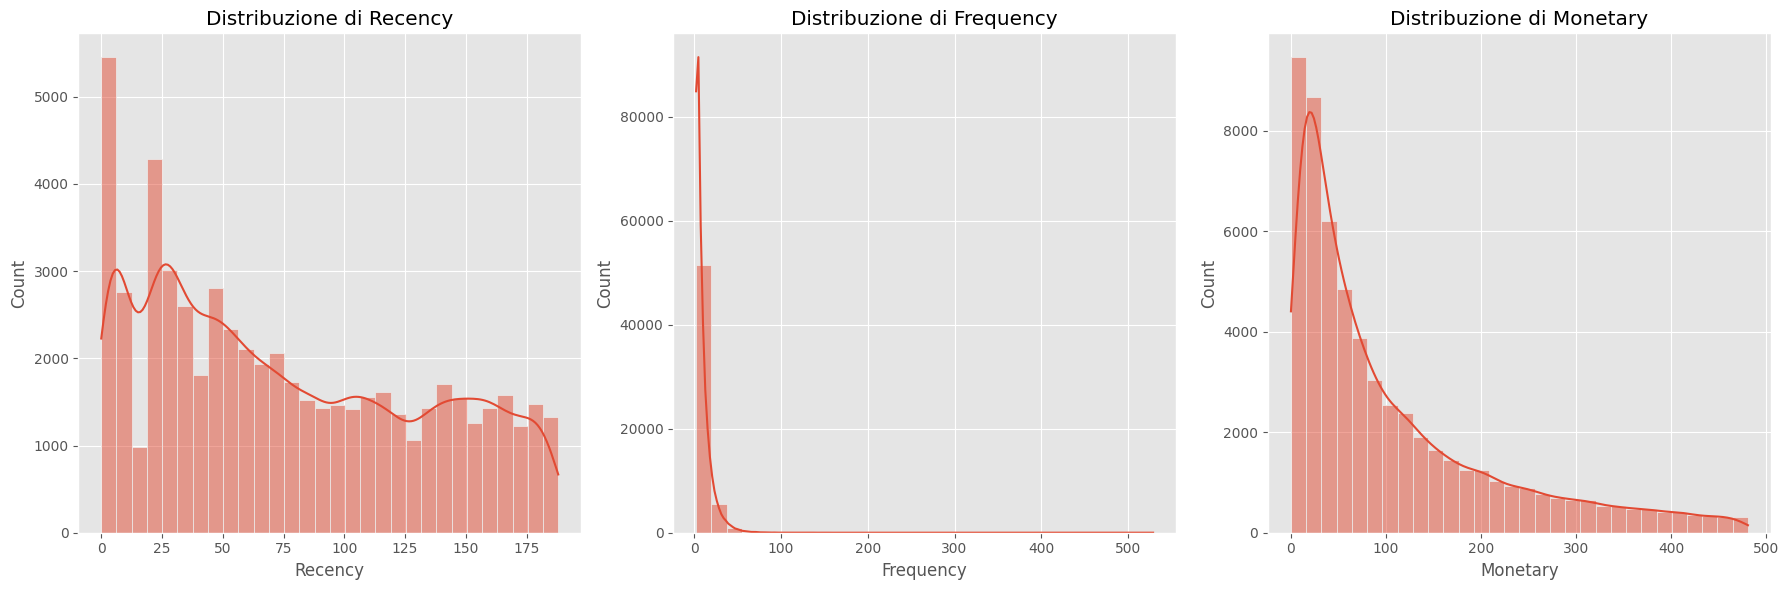

In [69]:
# Analisi descrittiva
print(rfm.describe())

# Visualizzazione grafica: distribuzione di Recency, Frequency e Monetary
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(rfm['Recency'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribuzione di Recency')

sns.histplot(rfm['Frequency'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribuzione di Frequency')

sns.histplot(rfm['Monetary'], bins=30, kde=True, ax=axes[2])
axes[2].set_title('Distribuzione di Monetary')

plt.tight_layout()
plt.show()

In [70]:
# Funzione per rimuovere outlier utilizzando l'intervallo interquartile (IQR)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Rimuovi outlier dalle colonne 'Recency', 'Frequency' e 'Monetary'

for column in ['Recency', 'Frequency', 'Monetary']:
    rfm = remove_outliers(rfm, column)


         customer_id     account_id       Recency     Frequency      Monetary
count   50356.000000   50356.000000  50356.000000  50356.000000  50356.000000
mean   468648.390678  476468.308623     78.441318      7.347943     74.215704
std    268954.874461  258144.547472     55.744030      5.254316     67.754636
min        32.000000      32.000000      0.000000      2.000000      0.000000
25%    224170.250000  251508.250000     30.000000      3.000000     22.000000
50%    500888.500000  514114.000000     68.000000      6.000000     51.000000
75%    698103.500000  689524.500000    127.000000     10.000000    109.000000
max    934620.000000  928110.000000    188.000000     24.000000    288.000000


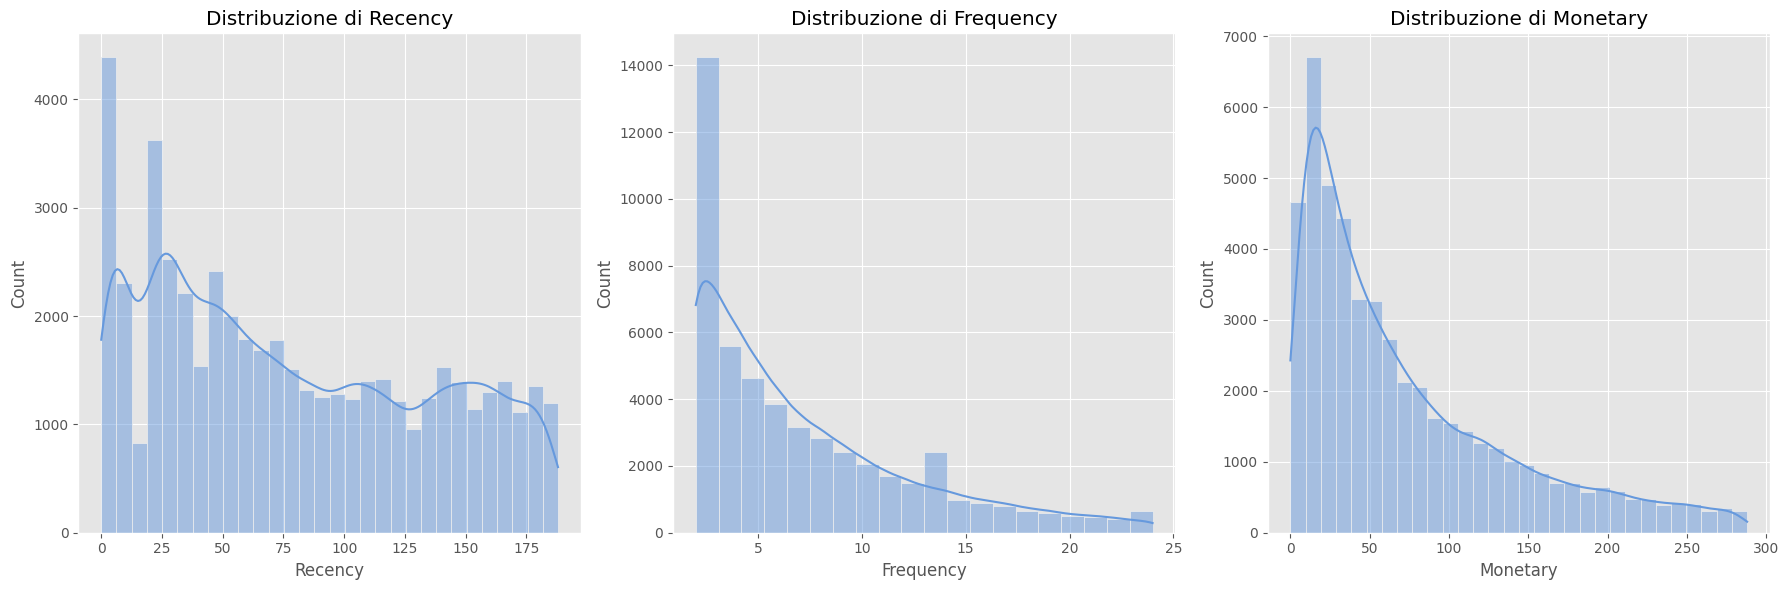

In [71]:
# Analisi descrittiva
print(rfm.describe())

# Visualizzazione grafica: distribuzione di Recency, Frequency e Monetary
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(rfm['Recency'], bins=30, kde=True, ax=axes[0], color='#69d')
axes[0].set_title('Distribuzione di Recency')

sns.histplot(rfm['Frequency'], bins=20, kde=True, ax=axes[1], color='#69d')
axes[1].set_title('Distribuzione di Frequency')

sns.histplot(rfm['Monetary'], bins=30, kde=True, ax=axes[2], color='#69d')
axes[2].set_title('Distribuzione di Monetary')

plt.tight_layout()
plt.show()

In [72]:
quantiles = rfm[['Recency','Frequency', 'Monetary']].quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,30.0,3.0,22.0
0.50,68.0,6.0,51.0
0.75,127.0,10.0,109.0


In [73]:
quantiles.to_dict()

{'Recency': {0.25: 30.0, 0.5: 68.0, 0.75: 127.0},
 'Frequency': {0.25: 3.0, 0.5: 6.0, 0.75: 10.0},
 'Monetary': {0.25: 22.0, 0.5: 51.0, 0.75: 109.0}}

In [74]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

In [75]:
#create rfm segmentation table
rfm_segmentation = rfm
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [76]:
rfm_segmentation.head()

,customer_id,account_id,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
0,514958,456034,43,12,29.0,3,4,2
2,883352,869428,33,2,80.0,3,1,3
3,133809,30178,67,4,19.0,3,2,1
4,608947,600590,176,4,96.0,1,2,3
6,755015,727435,123,4,30.0,2,2,2


In [77]:
rfm['Monetary'].describe()

count    50356.000000
mean        74.215704
std         67.754636
min          0.000000
25%         22.000000
50%         51.000000
75%        109.000000
max        288.000000
Name: Monetary, dtype: float64

In [78]:
rfm['Recency'].describe()

count    50356.000000
mean        78.441318
std         55.744030
min          0.000000
25%         30.000000
50%         68.000000
75%        127.000000
max        188.000000
Name: Recency, dtype: float64

# Manual Clustering

In [79]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,customer_id,account_id,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
0,514958,456034,43,12,29.0,3,4,2,342
2,883352,869428,33,2,80.0,3,1,3,313
3,133809,30178,67,4,19.0,3,2,1,321
4,608947,600590,176,4,96.0,1,2,3,123
6,755015,727435,123,4,30.0,2,2,2,222


In [80]:
rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('Monetary', ascending=False).head(10)

,customer_id,account_id,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
74398,681224,644701,23,23,288.0,4,4,4,444
40841,99057,771874,24,17,288.0,4,4,4,444
23408,866594,851227,5,15,287.0,4,4,4,444
75289,186623,87720,21,16,287.0,4,4,4,444
73751,385752,308941,0,24,287.0,4,4,4,444
3778,197926,100148,18,11,287.0,4,4,4,444
73625,666689,628461,1,21,287.0,4,4,4,444
23203,857486,841096,10,11,287.0,4,4,4,444
64484,186591,87670,4,12,286.0,4,4,4,444
70667,473735,408972,23,18,286.0,4,4,4,444


## First segmentation made on RFM

In [85]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Best Customers:  1927
Loyal Customers:  11561
Big Spenders:  12458
Almost Lost:  1396
Lost Customers:  1149
Lost Cheap Customers:  2440


In [86]:
categories = {
    "Best Customers": len(rfm_segmentation[rfm_segmentation['RFMScore'] == '444']),
    "Loyal Customers": len(rfm_segmentation[rfm_segmentation['F_Quartile'] == 4]),
    "Big Spenders": len(rfm_segmentation[rfm_segmentation['M_Quartile'] == 4]),
    "Almost Lost": len(rfm_segmentation[rfm_segmentation['RFMScore'] == '244']),
    "Lost Customers": len(rfm_segmentation[rfm_segmentation['RFMScore'] == '144']),
    "Lost Cheap Customers": len(rfm_segmentation[rfm_segmentation['RFMScore'] == '111']),
}

<ipython-input-87-d58648b927f1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(categories.keys()), y=list(categories.values(),), palette = "Spectral", )


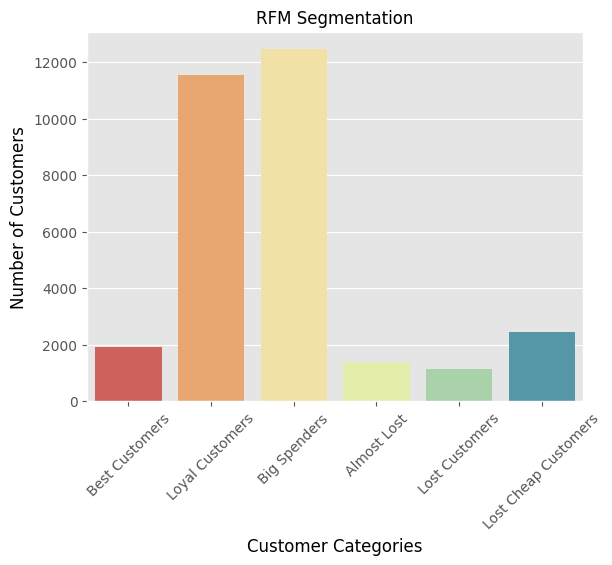

In [87]:
# Crea l'istogramma utilizzando seaborn
sns.barplot(x=list(categories.keys()), y=list(categories.values(),), palette = "Spectral", )

# Aggiunge etichette e titolo al grafico
plt.xlabel('Customer Categories', fontsize=12, color='black')
plt.ylabel('Number of Customers', fontsize=12, color='black')
plt.title('RFM Segmentation', fontsize=12, color='black')
plt.xticks(rotation=45)
plt.show()

## Second segmentation based only on RF
 We consider M as a consequence of these two

In [88]:
rfm_segmentation['RFScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str)

In [89]:
seg_map = {r'[1-2][1-2]': 'hibernating',
           r'[1-2][3-4]': 'at_Risk',
           r'3[1-2]': 'about_to_sleep',
           r'[2-3][3-4]': 'loyal_customers',
           r'[3-4][1-2]': 'potential_loyalists',
           r'4[3-4]': 'champions'}

rfm_segmentation['segment'] = rfm_segmentation['RFScore'].replace(seg_map, regex = True)

rfm_segmentation.head()

,customer_id,account_id,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,RFScore,segment
0,514958,456034,43,12,29.0,3,4,2,342,34,loyal_customers
2,883352,869428,33,2,80.0,3,1,3,313,31,about_to_sleep
3,133809,30178,67,4,19.0,3,2,1,321,32,about_to_sleep
4,608947,600590,176,4,96.0,1,2,3,123,12,hibernating
6,755015,727435,123,4,30.0,2,2,2,222,22,hibernating


In [90]:
seg_map

{'[1-2][1-2]': 'hibernating',
 '[1-2][3-4]': 'at_Risk',
 '3[1-2]': 'about_to_sleep',
 '[2-3][3-4]': 'loyal_customers',
 '[3-4][1-2]': 'potential_loyalists',
 '4[3-4]': 'champions'}

In [91]:
# Get the counts of each segment
segments = rfm_segmentation["segment"].value_counts().sort_values(ascending=False)

# Get the labels from the unique segments
labels = segments.index.tolist()


In [92]:
# Count number of customers for each cluster
cluster_counts_seg = rfm_segmentation['segment'].value_counts().sort_index()
cluster_counts_seg

segment
about_to_sleep          6581
at_Risk                 9822
champions               6525
hibernating            15216
loyal_customers         5692
potential_loyalists     6520
Name: count, dtype: int64

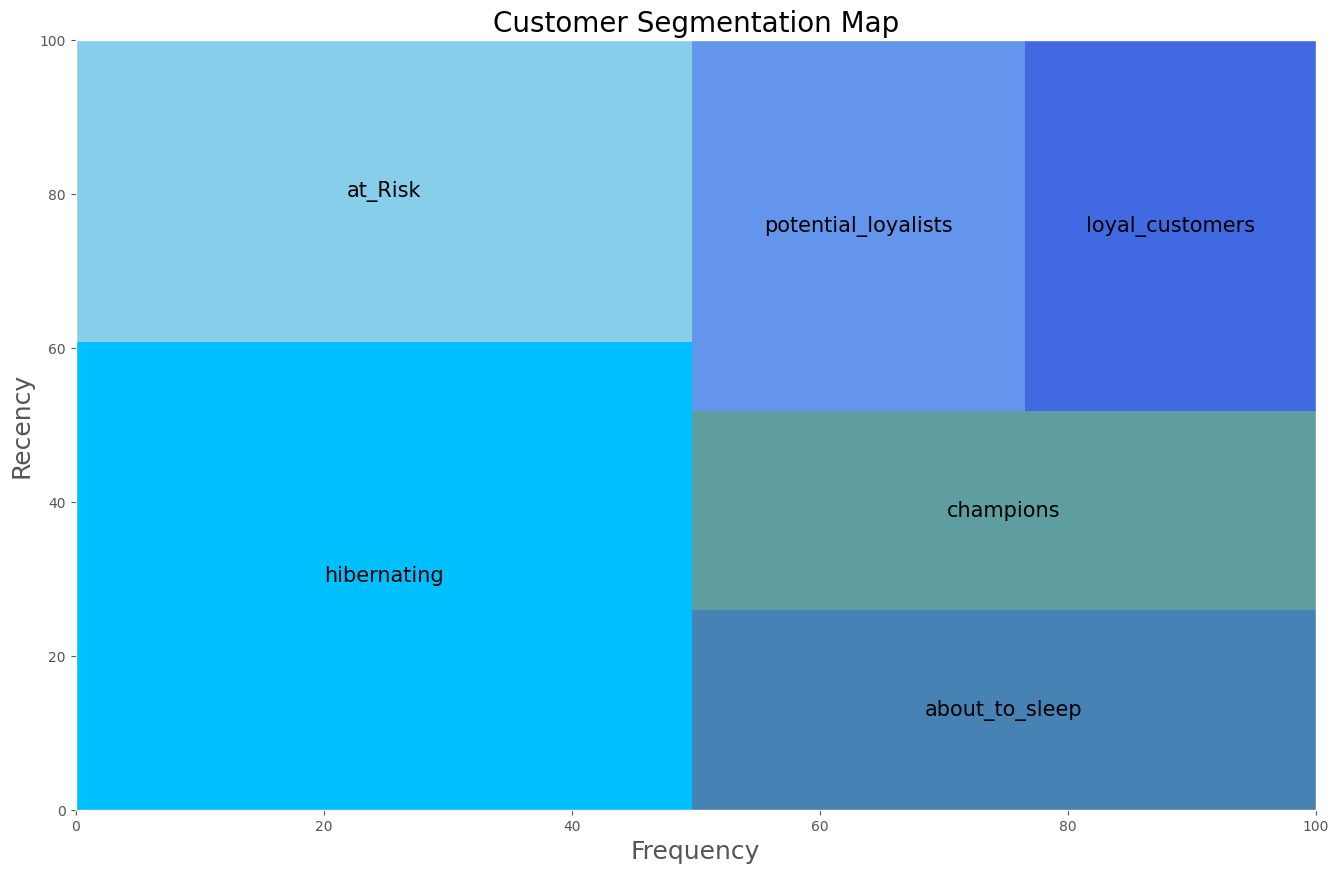

In [93]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 10)
squarify.plot(
    sizes=segments,
    label=labels,
  color = [
    "#00BFFF",  # DeepSkyBlue
    "#87CEEB",  # SkyBlue
    "#4682B4",  # SteelBlue
    "#5F9EA0",  # CadetBlue
    "#6495ED",  # CornflowerBlue
    "#4169E1",  # RoyalBlue
    "#6A5ACD",  # SlateBlue
    ],
    pad=False,
    bar_kwargs={"alpha": 1},
    text_kwargs={"fontsize": 15},
)
plt.title("Customer Segmentation Map", fontsize=20)
plt.xlabel("Frequency", fontsize=18)
plt.ylabel("Recency", fontsize=18)
plt.show()

In [94]:
print(' RFM Model Evaluation '.center(70, '='))
X = rfm_segmentation[['Recency', 'Frequency']]
labels = rfm['segment']
print(f'Number of Observations: {X.shape[0]}')
print(f'Number of Segments: {labels.nunique()}')
print(f'Silhouette Score: {round(silhouette_score(X, labels), 3)}')
print(f'Calinski Harabasz Score: {round(calinski_harabasz_score(X, labels), 3)}')
print(f'Davies Bouldin Score: {round(davies_bouldin_score(X, labels), 3)} \n{70*"="}')

======================== RFM Model Evaluation ========================
Number of Observations: 50356
Number of Segments: 6
Silhouette Score: 0.067
Calinski Harabasz Score: 37431.051
Davies Bouldin Score: 3.658 


Essendo valore di Silhuoette troppo basso cerchiamo quello che sarebbe un numero di cluster adatto

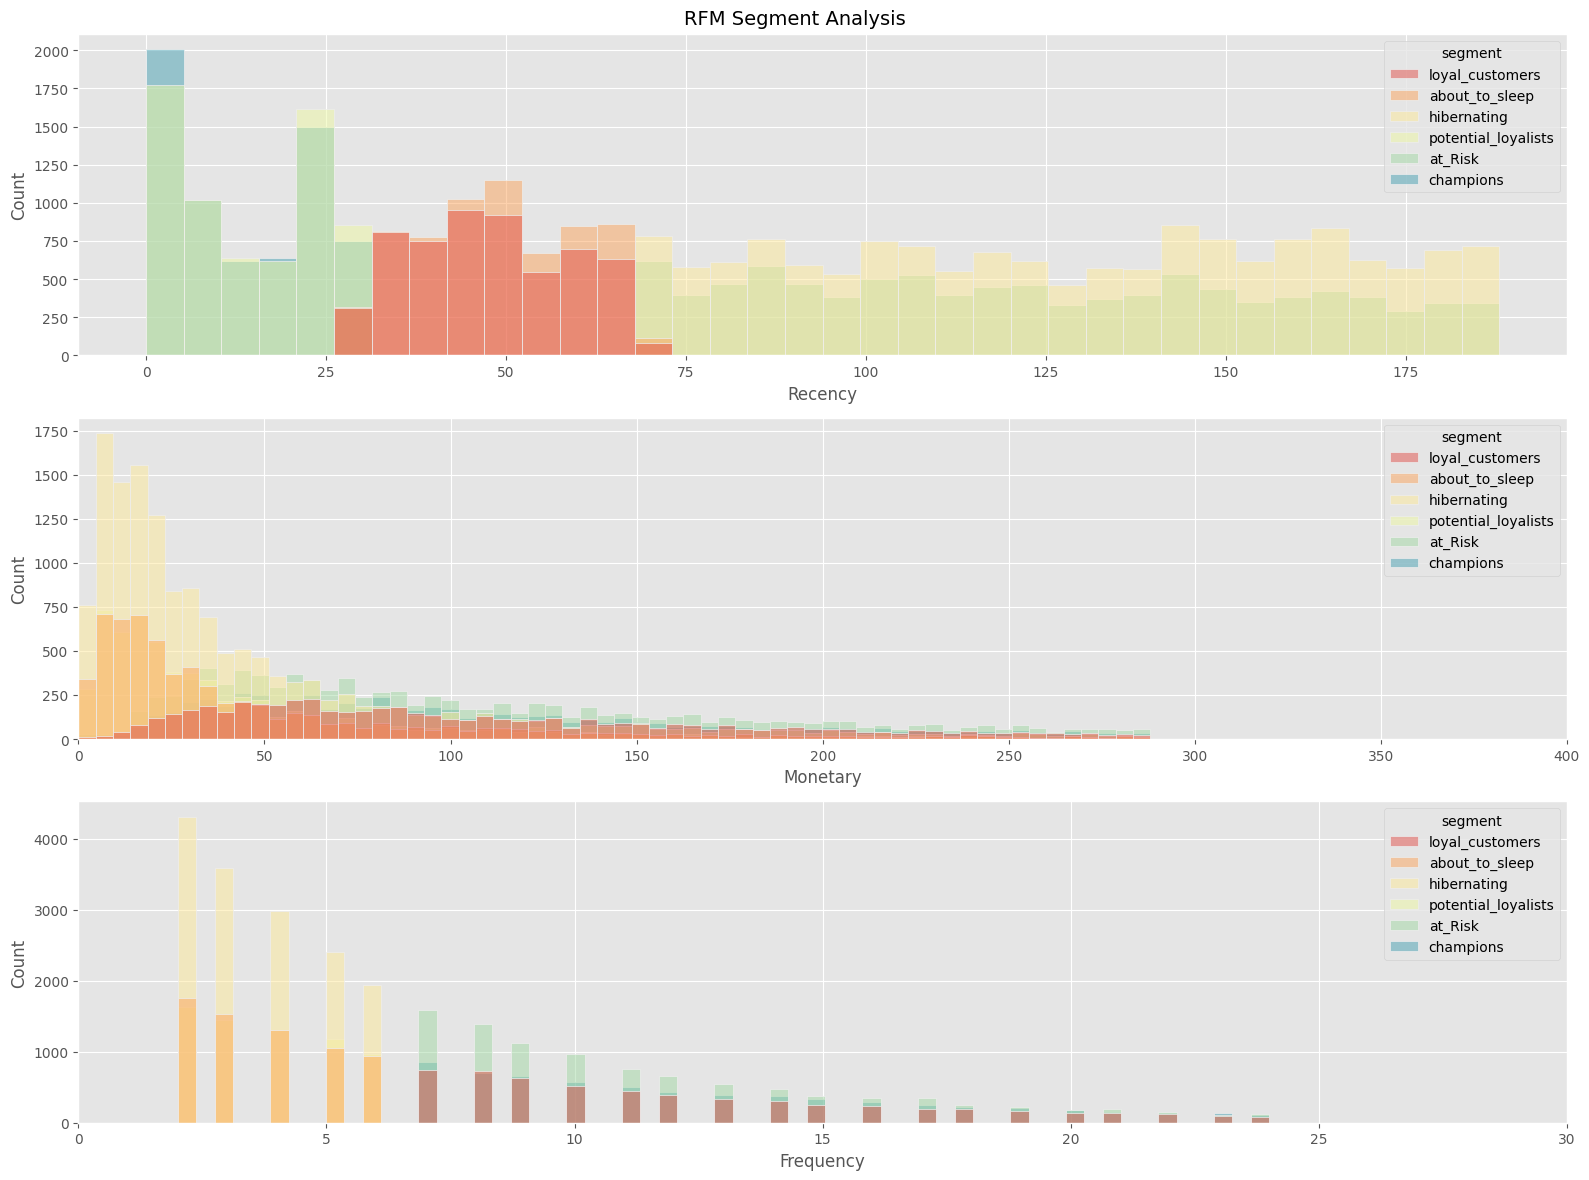

In [96]:
fig, axes = plt.subplots(3, 1, figsize=(16, 12))
fig.suptitle('RFM Segment Analysis', size = 14)
feature_list = ['Recency', 'Monetary', 'Frequency']
for idx, col in enumerate(feature_list):
    sns.histplot(ax = axes[idx], data = rfm,
                 hue = 'segment', x = feature_list[idx],
                 palette= 'Spectral')
    if idx == 1:
        axes[idx].set_xlim([0, 400])
    if idx == 2:
        axes[idx].set_xlim([0, 30])
plt.tight_layout()
plt.show()

# K-Mean Clustering


In [97]:
rfm_clustering = rfm[['customer_id','Recency','Frequency', 'Monetary']]
rfm_clustering.set_index('customer_id',inplace=True)
rfm_clustering.head()

,Recency,Frequency,Monetary
customer_id,,,
514958,43,12,29.0
883352,33,2,80.0
133809,67,4,19.0
608947,176,4,96.0
755015,123,4,30.0


In [98]:
# Assuming df is your dataframe containing the RFM metrics
rfm_clustering['Recency'] = np.log(rfm_clustering['Recency'] + 1)  # Adding 1 to avoid log(0)
rfm_clustering['Frequency'] = np.log(rfm_clustering['Frequency'] + 1)
rfm_clustering['Monetary'] = np.log(rfm_clustering['Monetary'] + 1)


In [99]:
def optimal_kmeans(dataset, start=2, end=11):
    '''
    Calculate the optimal number of kmeans

    INPUT:
        dataset : dataframe. Dataset for k-means to fit
        start : int. Starting range of kmeans to test
        end : int. Ending range of kmeans to test
    OUTPUT:
        Values and line plot of Silhouette Score.
    '''

    # Create empty lists to store values for plotting graphs
    n_clu = []
    km_ss = []

    # Create a for loop to find optimal n_clusters
    for n_clusters in range(start, end):

        # Create cluster labels
        kmeans = KMeans(n_clusters=n_clusters)
        labels = kmeans.fit_predict(dataset)

        # Calcualte model performance
        silhouette_avg = round(silhouette_score(dataset, labels, random_state=1), 3)

        # Append score to lists
        km_ss.append(silhouette_avg)
        n_clu.append(n_clusters)

        print("No. Clusters: {}, Silhouette Score: {}, Change from Previous Cluster: {}".format(
            n_clusters,
            silhouette_avg,
            (km_ss[n_clusters - start] - km_ss[n_clusters - start - 1]).round(3)))

        # Plot graph at the end of loop
        if n_clusters == end - 1:
            plt.figure(figsize=(6.47,4))

            plt.title('Silhouette Score of Different Number of Clusters')
            plt.ylabel('Silhouette Score')
            plt.xlabel('Number of Clusters')
            sns.pointplot(x=n_clu, y=km_ss)
            plt.savefig('silhouette_score.png', format='png', dpi=1000)
            plt.tight_layout()
            plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

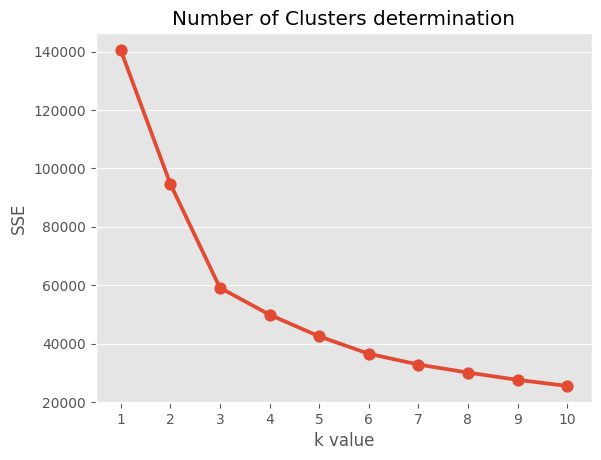

In [100]:
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=40)
    kmeans.fit(rfm_clustering)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid
plt.title('Number of Clusters determination')
plt.xlabel('k value')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [ ]:
# optimal_kmeans(rfm_clustering)

In [101]:
model = KMeans(n_clusters=4, random_state=40)
model.fit(rfm_clustering)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=40)

In [102]:
rfm_clustering["Cluster"] = model.labels_
rfm_clustering.head()

,Recency,Frequency,Monetary,Cluster
customer_id,,,,
514958,3.784190,2.564949,3.401197,0
883352,3.526361,1.098612,4.394449,0
133809,4.219508,1.609438,2.995732,1
608947,5.176150,1.609438,4.574711,3
755015,4.820282,1.609438,3.433987,1


In [103]:
rfm_clustering

,Recency,Frequency,Monetary,Cluster
customer_id,,,,
514958,3.784190,2.564949,3.401197,0
883352,3.526361,1.098612,4.394449,0
133809,4.219508,1.609438,2.995732,1
608947,5.176150,1.609438,4.574711,3
755015,4.820282,1.609438,3.433987,1
...,...,...,...,...
428226,0.693147,3.135494,4.919981,2
571196,4.442651,2.944439,5.501258,3
161251,3.367296,3.218876,5.010635,0


In [104]:
rfm_cl = pd.melt(rfm_clustering.reset_index(),
                      id_vars=['customer_id', 'Cluster'],
                      value_vars=['Recency','Frequency','Monetary'],
                      var_name='Attribute',
                      value_name='Value')
rfm_cl.head()

,customer_id,Cluster,Attribute,Value
0,514958,0,Recency,3.784190
1,883352,0,Recency,3.526361
2,133809,1,Recency,4.219508
3,608947,3,Recency,5.176150
4,755015,1,Recency,4.820282


<Axes: xlabel='Attribute', ylabel='Value'>

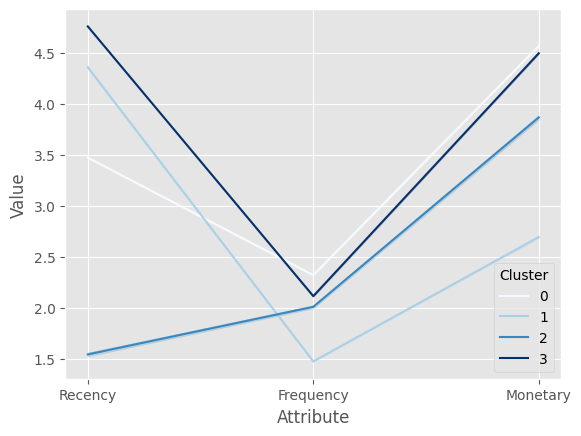

In [105]:
sns.lineplot(x='Attribute', y='Value', hue='Cluster', data=rfm_cl, palette = 'Blues')

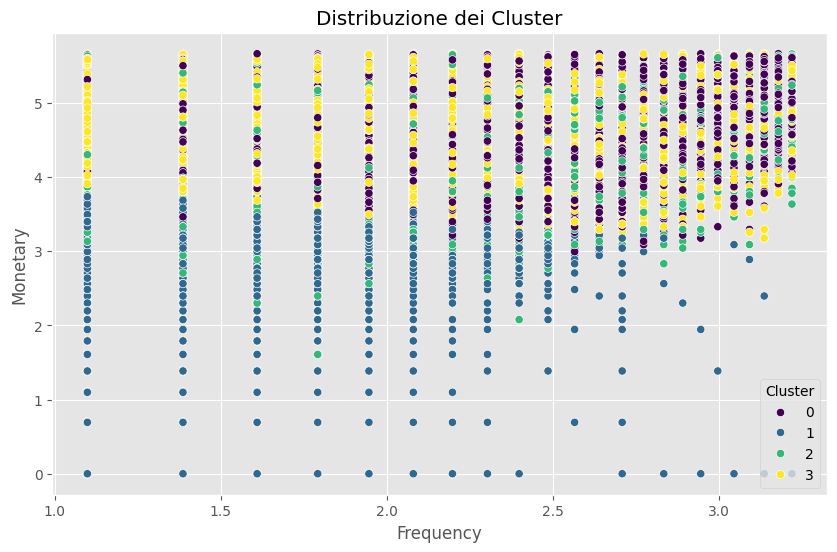

In [106]:
# Visualizzazione grafica: cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_clustering, x='Frequency', y='Monetary', hue='Cluster', palette='viridis')
plt.title('Distribuzione dei Cluster')
plt.show()

            Recency     Frequency      Monetary       Cluster
count  50356.000000  50356.000000  50356.000000  50356.000000
mean       3.953822      1.941505      3.849864      1.544821
std        1.134454      0.595370      1.072667      1.167101
min        0.000000      1.098612      0.000000      0.000000
25%        3.433987      1.386294      3.135494      1.000000
50%        4.234107      1.945910      3.951244      1.000000
75%        4.852030      2.397895      4.700480      3.000000
max        5.241747      3.218876      5.666427      3.000000


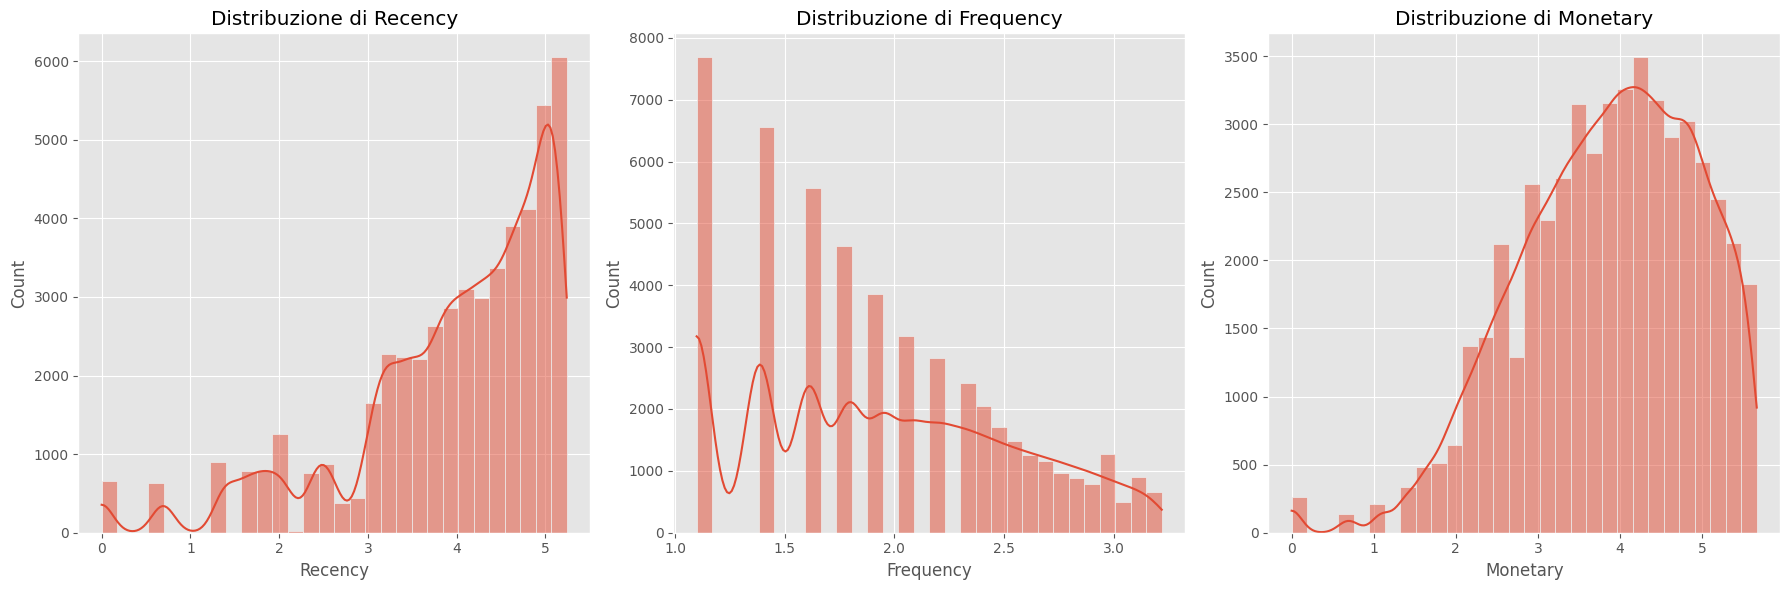

In [107]:
# Analisi descrittiva
print(rfm_clustering.describe())

# Visualizzazione grafica: distribuzione di Recency, Frequency e Monetary
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(rfm_clustering['Recency'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribuzione di Recency')

sns.histplot(rfm_clustering['Frequency'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribuzione di Frequency')

sns.histplot(rfm_clustering['Monetary'], bins=30, kde=True, ax=axes[2])
axes[2].set_title('Distribuzione di Monetary')

plt.tight_layout()
plt.show()

In [108]:
# Count number of customers for each cluster
cluster_counts = rfm_clustering['Cluster'].value_counts().sort_index()

# Display the count of customers in each cluster
print(cluster_counts)



Cluster
0    11529
1    16385
2     5920
3    16522
Name: count, dtype: int64


In [109]:
print(' RFM Model Evaluation '.center(70, '='))
X = rfm_clustering[['Recency', 'Frequency', 'Monetary']]
labels = rfm_clustering['Cluster']
print(f'Number of Observations: {X.shape[0]}')
print(f'Number of Segments: {labels.nunique()}')
print(f'Silhouette Score: {round(silhouette_score(X, labels), 3)}')
print(f'Calinski Harabasz Score: {round(calinski_harabasz_score(X, labels), 3)}')
print(f'Davies Bouldin Score: {round(davies_bouldin_score(X, labels), 3)} \n{70*"="}')

======================== RFM Model Evaluation ========================
Number of Observations: 50356
Number of Segments: 4
Silhouette Score: 0.307
Calinski Harabasz Score: 30524.133
Davies Bouldin Score: 1.121 


# Output

In [111]:
hv_customers = rfm_segmentation[rfm_segmentation['RFMScore']=='444']
# Filtraggio dei record presenti in hv_customers
hv_customers = recurrent_customers[recurrent_customers['customer_id'].isin(hv_customers['customer_id'])]
hv_customers = hv_customers[hv_customers['flag_privacy'] == True ]
hv_customers.to_csv(dir + '/hv_customers.csv', index=False)